In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<h3>Load Data</h3>

In [4]:
home = pd.read_csv("../Collection of DS take home challenges/data collection-Product dataset数据挑战数据集/INSIGHTS Funnel Analysis/home_page_table.csv")
payment_confirmation = pd.read_csv("../Collection of DS take home challenges/data collection-Product dataset数据挑战数据集/INSIGHTS Funnel Analysis/payment_confirmation_table.csv")
payment = pd.read_csv("../Collection of DS take home challenges/data collection-Product dataset数据挑战数据集/INSIGHTS Funnel Analysis/payment_page_table.csv")
search = pd.read_csv("../Collection of DS take home challenges/data collection-Product dataset数据挑战数据集/INSIGHTS Funnel Analysis/search_page_table.csv")
user = pd.read_csv("../Collection of DS take home challenges/data collection-Product dataset数据挑战数据集/INSIGHTS Funnel Analysis/user_table.csv")

In [6]:
# using left join so we know when users churn
df = user.merge(home, how = "left", on = "user_id", suffixes = ("_user", "_home")).merge(search, how = "left", on = "user_id", suffixes = ("_home", "_search")).merge(payment, how = "left", on = "user_id", suffixes = ("_search", "_payment")).merge(payment_confirmation, how = "left", on = "user_id", suffixes = ("_payment", "_payment_confirmation"))

In [8]:
df.head()

,user_id,date,device,sex,page_home,page_search,page_payment,page_payment_confirmation
0,450007,2015-02-28,Desktop,Female,home_page,NaN,NaN,NaN
1,756838,2015-01-13,Desktop,Male,home_page,NaN,NaN,NaN
2,568983,2015-04-09,Desktop,Male,home_page,search_page,NaN,NaN
3,190794,2015-02-18,Desktop,Female,home_page,search_page,NaN,NaN
4,537909,2015-01-15,Desktop,Male,home_page,NaN,NaN,NaN


In [10]:
df.describe()

,user_id
count,90400.000000
mean,498709.683473
std,289040.674085
min,17.000000
25%,247978.750000
50%,498267.000000
75%,749789.250000
max,999979.000000


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90400 entries, 0 to 90399
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   user_id                    90400 non-null  int64 
 1   date                       90400 non-null  object
 2   device                     90400 non-null  object
 3   sex                        90400 non-null  object
 4   page_home                  90400 non-null  object
 5   page_search                45200 non-null  object
 6   page_payment               6030 non-null   object
 7   page_payment_confirmation  452 non-null    object
dtypes: int64(1), object(7)
memory usage: 6.2+ MB


In [14]:
df.device.unique()

array(['Desktop', 'Mobile'], dtype=object)

<h3>EDA</h3>

Visit Probability for Each Page

In [16]:
conversion = (len(df)-pd.DataFrame(df.isnull().sum()).rename(columns = {0:"conversion"}))/len(df)
conversion = conversion.reset_index()[4:]
conversion

,index,conversion
4,page_home,1.000000
5,page_search,0.500000
6,page_payment,0.066704
7,page_payment_confirmation,0.005000


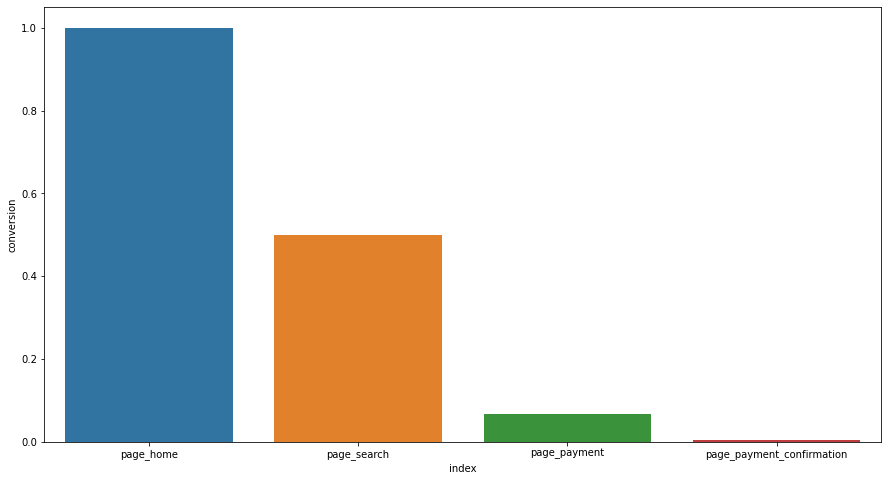

In [20]:
fig, ax = plt.subplots(figsize = (15, 8))
sns.barplot(x = "index", y = "conversion", data = conversion)
plt.show()

Conversion rate at each page

In [41]:
page_conversion = pd.DataFrame(len(df)-df.isnull().sum()).rename(columns = {0:"conversion"})[4:]

In [42]:
page_conversion = (page_conversion.shift(-1)/page_conversion).reset_index()
page_conversion

,index,conversion
0,page_home,0.500000
1,page_search,0.133407
2,page_payment,0.074959
3,page_payment_confirmation,NaN


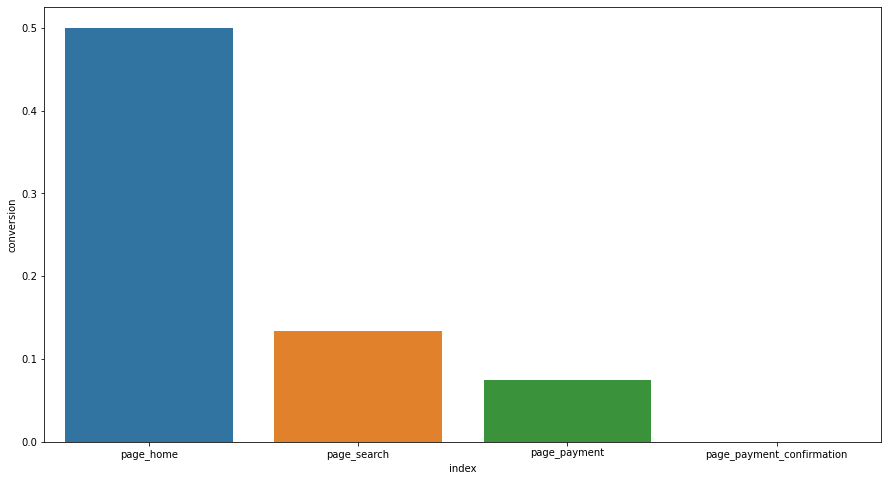

In [43]:
fig, ax = plt.subplots(figsize = (15, 8))
sns.barplot(x = "index", y = "conversion", data = page_conversion)
plt.show()

Device


In [44]:
df.device.unique()

array(['Desktop', 'Mobile'], dtype=object)

In [46]:
df_desk = df[df["device"] == "Desktop"]
df_mobile = df[df["device"] == "Mobile"]

In [52]:
df_desk_conversion = pd.DataFrame(len(df_desk)-(df_desk.isnull().sum()))
df_mobile_conversion = pd.DataFrame(len(df_mobile)-(df_mobile.isnull().sum()))

In [53]:
df_desk_conversion = (df_desk_conversion.shift(-1)/df_desk_conversion).reset_index()[4:]
df_mobile_conversion = (df_mobile_conversion.shift(-1)/df_mobile_conversion).reset_index()[4:]

In [61]:
df_device = pd.concat([df_desk_conversion, df_mobile_conversion], axis = 1, sort = False)
df_device = df_device[0:3]

In [74]:
df_device.columns = ["Page", "Desktop", "abc", "Mobile"]

In [76]:
df_device.drop("abc", axis = 1, inplace = True)

In [77]:
df_device

,Page,Desktop,Mobile
4,page_home,0.500000,0.5
5,page_search,0.100000,0.2
6,page_payment,0.049834,0.1


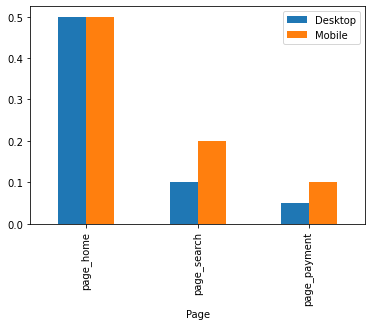

In [83]:
df_device.plot(x = "Page", y = ["Desktop", "Mobile"], kind = "bar")
plt.show()

Sex

In [84]:
df_male = df[df["sex"] == "Male"]
df_fe = df[df["sex"] == "Female"]

df_male_conversion = pd.DataFrame(len(df_male)-(df_male.isnull().sum()))
df_fe_conversion = pd.DataFrame(len(df_fe)-(df_fe.isnull().sum()))

df_male_conversion = (df_male_conversion.shift(-1)/df_male_conversion).reset_index()[4:]
df_fe_conversion = (df_fe_conversion.shift(-1)/df_fe_conversion).reset_index()[4:]

df_sex = pd.concat([df_male_conversion, df_fe_conversion], axis = 1, sort = False)
df_sex = df_sex[0:3]
df_sex

,index,0,index,0
4,page_home,0.496944,page_home,0.503073
5,page_search,0.130083,page_search,0.136708
6,page_payment,0.072014,page_payment,0.077742


In [85]:
df_sex.columns = ["Page", "Male", "abc", "Female"]
df_sex.drop("abc", axis = 1, inplace = True)

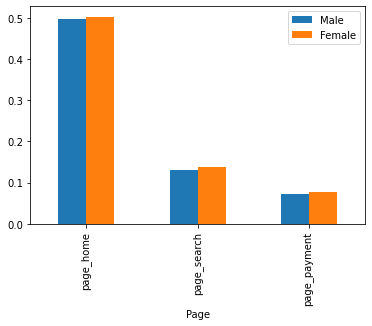

In [86]:
df_sex.plot(x = "Page", y = ["Male", "Female"], kind = "bar")
plt.show()